In [3]:
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
hvc_all=pd.read_csv('HVC_finalmags.csv',header=None)

In [5]:
hvc_all.head(2)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2MASSJ014825.88+132305.3,M014825.88+13,HIRES,0.17,13.71,0.03,0.11,0.05,0.03,0.07,...,99.99,9.99,0,9.99,0,9.99,18.72,0.07,16.68,0.01
1,2MASSJ014936.48+143914.6,M014936.48+14,HIRES,0.15,13.90,0.01,0.12,0.02,0.02,0.04,...,99.99,9.99,0,9.99,0,9.99,19.21,0.08,16.77,0.01


In [6]:
hvc_all[26]=hvc_all[3]/3.1

In [7]:
pd.Series.to_csv(hvc_all.loc[hvc_all[16]<29][0],'paka.dat',index=False)

In [8]:
len(hvc_all)

1560

In [9]:
hvc_all['B']=hvc_all[6]+hvc_all[4]

In [10]:
hvc_all['U']=hvc_all[8]+hvc_all['B']

In [11]:
hvc_all['errB']=np.sqrt(abs(hvc_all[7]**2 + hvc_all[5]**2))

In [12]:
hvc_all['errU']=np.sqrt(abs(hvc_all[9]**2 + hvc_all['errB']**2))

In [13]:
hvc_all['J']=hvc_all[10]-0.709*hvc_all[26]
hvc_all['H']=hvc_all[12]-0.449*hvc_all[26]
hvc_all['K']=hvc_all[14]-0.302*hvc_all[26]

In [14]:
#hvc_all['FUV']=hvc_all[22]-8.06*hvc_all[26]
#hvc_all['NUV']=hvc_all[24]-7.95*hvc_all[26]
hvc_all['FUV']=hvc_all[22]-8.16*hvc_all[26]#kinman relation
hvc_all['NUV']=hvc_all[24]-8.90*hvc_all[26]

In [15]:
hvc_all['g']=hvc_all[16]
hvc_all['r']=hvc_all[18]-hvc_all['g']
hvc_all['u']=hvc_all[20]+hvc_all['g']

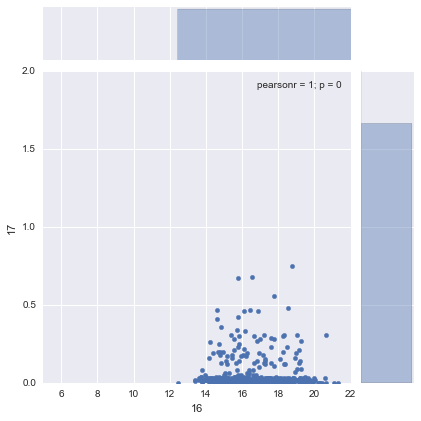

In [16]:
sns.jointplot(hvc_all[16],hvc_all[17],xlim=(5,22),ylim=(0,2))

In [17]:
hvc_all['errr']=np.sqrt(abs(hvc_all[17]**2 + hvc_all[19]**2))
hvc_all['erru']=np.sqrt(abs(hvc_all[21]**2 + hvc_all[17]**2))

In [18]:
hvc_all.head(2)

,0,1,2,3,4,5,6,7,8,9,...,J,H,K,FUV,NUV,g,r,u,errr,erru
0,2MASSJ014825.88+132305.3,M014825.88+13,HIRES,0.17,13.71,0.03,0.11,0.05,0.03,0.07,...,13.811119,13.165377,13.123439,18.272516,16.191935,99.99,-99.99,99.99,14.127993,14.127993
1,2MASSJ014936.48+143914.6,M014936.48+14,HIRES,0.15,13.90,0.01,0.12,0.02,0.02,0.04,...,14.205694,13.638274,13.625387,18.815161,16.339355,99.99,-99.99,99.99,14.127993,14.127993


In [19]:
hvc_all.columns

Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
            9,     10,     11,     12,     13,     14,     15,     16,     17,
           18,     19,     20,     21,     22,     23,     24,     25,     26,
          'B',    'U', 'errB', 'errU',    'J',    'H',    'K',  'FUV',  'NUV',
          'g',    'r',    'u', 'errr', 'erru'],
      dtype='object')

In [20]:
hvc_rc=hvc_all.drop([2,3,6,7,8,9,18,19,20,21],axis=1)

In [21]:
hvc_all[18].unique()

array([ 0.  ,  0.24,  0.01, -0.31, -0.27,  0.12,  0.07, -0.19, -0.22,
       -0.56, -0.2 ,  0.39,  0.25, -0.17,  0.04, -0.16, -0.14, -0.02,
        0.27, -0.24, -0.12,  0.19,  0.08,  0.03,  0.29,  0.26,  0.06,
        0.22,  0.2 , -0.18,  0.05, -0.25, -0.15,  0.16, -0.08, -0.23,
       -0.21,  0.15,  0.14, -0.07,  0.18, -0.06, -0.03,  0.1 ,  0.02,
        0.23,  0.11,  0.36,  0.28, -0.04, -0.26,  0.17, -0.1 , -0.09,
       -0.01,  0.13, -0.13,  0.37, -0.05,  0.09, -0.28,  0.3 ,  0.21,
       -0.3 ,  0.45,  0.61,  0.63,  0.35, -0.34,  0.31, -0.29, -0.32,
        0.51,  0.43, -0.4 ,  0.54,  0.56,  0.5 , -0.53,  0.48,  0.72,
        0.57,  0.42,  0.6 ,  0.53,  0.52,  0.65,  0.66,  0.62,  0.71,
        0.76,  0.59,  0.47,  0.44,  0.58,  1.43,  0.33,  0.41,  0.32,
        0.38,  0.46,  0.64])

In [22]:
hvc_rc.head(2)

,0,1,4,5,10,11,12,13,14,15,...,J,H,K,FUV,NUV,g,r,u,errr,erru
0,2MASSJ014825.88+132305.3,M014825.88+13,13.71,0.03,13.85,0.02,13.19,0.03,13.14,0.03,...,13.811119,13.165377,13.123439,18.272516,16.191935,99.99,-99.99,99.99,14.127993,14.127993
1,2MASSJ014936.48+143914.6,M014936.48+14,13.90,0.01,14.24,0.02,13.66,0.03,13.64,0.04,...,14.205694,13.638274,13.625387,18.815161,16.339355,99.99,-99.99,99.99,14.127993,14.127993


In [23]:
hvc_rc['V']=hvc_rc[4]

In [24]:
hvc_rc['errV']=hvc_rc[5]
hvc_rc['errJ']=hvc_rc[11]
hvc_rc['errH']=hvc_rc[13]
hvc_rc['errK']=hvc_rc[15]

In [25]:
hvc_rc['errFUV']=hvc_rc[23]
hvc_rc['errNUV']=hvc_rc[25]

In [26]:
hvc_rc.to_csv('hvc_mags',index=False)

In [27]:
hvc_all[hvc_all[0]=='SDSSJ120404.78+623345.6'][18]

106    0.05
Name: 18, dtype: float64

In [28]:
hvc_all[hvc_all[0]=='SDSSJ120404.78+623345.6']

,0,1,2,3,4,5,6,7,8,9,...,J,H,K,FUV,NUV,g,r,u,errr,erru
106,SDSSJ120404.78+623345.6,S120404.78+62,HIRES,0.06,15.8,0.01,0.34,0.01,-0.05,0.02,...,99.976277,99.98131,99.984155,20.232065,18.817742,15.92,-15.87,17.04,0,0


In [29]:
hvc_rc.head(2)

,0,1,4,5,10,11,12,13,14,15,...,u,errr,erru,V,errV,errJ,errH,errK,errFUV,errNUV
0,2MASSJ014825.88+132305.3,M014825.88+13,13.71,0.03,13.85,0.02,13.19,0.03,13.14,0.03,...,99.99,14.127993,14.127993,13.71,0.03,0.02,0.03,0.03,0.07,0.01
1,2MASSJ014936.48+143914.6,M014936.48+14,13.90,0.01,14.24,0.02,13.66,0.03,13.64,0.04,...,99.99,14.127993,14.127993,13.90,0.01,0.02,0.03,0.04,0.08,0.01


In [30]:
# x = np.linspace(0, 30, 30)
# y = np.sin(x/3*np.pi)
# y1 = np.cos(x/3*np.pi)
# error = np.random.normal(0.1, 0.02, size=y.shape)
# #y += np.random.normal(0, 0.2, size=y.shape)
# error=0.2

# #plt.plot(x, y,'')
# #plt.plot(x, y1,)
# plt.fill_between(x, y1-error, y1+error,color='y')
# plt.fill_between(x, y-error, y+error,color='g')


In [31]:
hvc_rc.head(2)

,0,1,4,5,10,11,12,13,14,15,...,u,errr,erru,V,errV,errJ,errH,errK,errFUV,errNUV
0,2MASSJ014825.88+132305.3,M014825.88+13,13.71,0.03,13.85,0.02,13.19,0.03,13.14,0.03,...,99.99,14.127993,14.127993,13.71,0.03,0.02,0.03,0.03,0.07,0.01
1,2MASSJ014936.48+143914.6,M014936.48+14,13.90,0.01,14.24,0.02,13.66,0.03,13.64,0.04,...,99.99,14.127993,14.127993,13.90,0.01,0.02,0.03,0.04,0.08,0.01


In [32]:
hvc_rc.columns

Index([       0,        1,        4,        5,       10,       11,       12,
             13,       14,       15,       16,       17,       22,       23,
             24,       25,       26,      'B',      'U',   'errB',   'errU',
            'J',      'H',      'K',    'FUV',    'NUV',      'g',      'r',
            'u',   'errr',   'erru',      'V',   'errV',   'errJ',   'errH',
         'errK', 'errFUV', 'errNUV'],
      dtype='object')

In [33]:
hvc1=pd.DataFrame([hvc_rc[0],hvc_rc['FUV'],hvc_rc['NUV'],hvc_rc['U'],hvc_rc['B'],hvc_rc['V'],hvc_rc['u'],hvc_rc['g'],hvc_rc['r'],hvc_rc['J'],hvc_rc['H']\
                  ,hvc_rc['K'],hvc_rc['errFUV'],hvc_rc['errNUV'],hvc_rc['errU'],hvc_rc['errB'],hvc_rc['errV']\
                  ,hvc_rc['erru'],hvc_rc[17],hvc_rc['errr'],hvc_rc['errJ'],hvc_rc['errH'],hvc_rc['errK']]).T

In [34]:
hvc1.columns=[       'ID',    'FUV',    'NUV',      'U',      'B',      'V',       'u',
            'g',      'r',      'J',      'H',      'K', 'errFUV',
       'errNUV',   'errU',   'errB',   'errV',       'erru',   'errg',   'errr',
         'errJ',   'errH',   'errK']

In [35]:
filters=('GALEX/GALEX.FUV','GALEX/GALEX.NUV','Generic/Johnson.U','Generic/Johnson.B','Generic/Johnson.V','SLOAN/SDSS.u','SLOAN/SDSS.g','SLOAN/SDSS.r',\
        '2MASS/2MASS.J','2MASS/2MASS.H','2MASS/2MASS.Ks')

In [36]:
hvc11=hvc1.as_matrix()

In [37]:
hvc1.drop_duplicates('ID',inplace=True)

In [38]:
hvc1.to_csv('hvc_photometry.dat',index=False)

In [39]:
dats=[]
for index, row in hvc1.iterrows():
    for j in range(len(filters)):
        if row[j+1] < 30.:
            dats.append((row[0],'...','...','...','...',filters[j],row[j+1],row[j+12],'...','...'))
        
np.savetxt('vosa_hvc.dat',dats,fmt='%s')

In [40]:
vosa=np.genfromtxt('14494.vosa.dat',dtype=str)

In [41]:
vosa

array([['2MASSJ014248.77+143016.4', '...', '...', ...,
        '1.0156029793866E-16', '...', '---'],
       ['2MASSJ014248.77+143016.4', '...', '...', ...,
        '6.8127073868392E-17', '...', '---'],
       ['2MASSJ014248.77+143016.4', '...', '...', ..., '5.99340266975E-17',
        '...', '---'],
       ..., 
       ['V1084Aql', '...', '...', ..., '7.5306057733394E-18', '...', '---'],
       ['V1084Aql', '...', '...', ..., '8.7280356878075E-18', '...', '---'],
       ['V1084Aql', '...', '...', ..., '5.2192860336E-18', '...', '---']], 
      dtype='<U24')

In [42]:
np.savetxt('hvc_obsflux.dat',[[i[0],i[5],i[6],i[7]] for i in vosa],fmt='%s')

In [43]:
obs=pd.read_csv('hvc_obsflux.dat',comment='#',header=None,sep=' ')

In [44]:
obs.head(2)

,0,1,2,3
0,2MASSJ014248.77+143016.4,GALEX/GALEX.NUV,2.827377e-16,1.015603e-16
1,2MASSJ014248.77+143016.4,Generic/Johnson.U,8.904704e-16,6.812707e-17


In [ ]:
pd.DataFrame(obs.groupby(obs[0]).count()[1]).to_csv('testing',header=None)

In [45]:
gb=obs.groupby(obs[0],sort=False)

In [46]:
ids=obs[0].unique()

In [47]:
obsg=[]
for i in ids:
    obsg.append([i]+list(gb.get_group(i)[2])+list(gb.get_group(i)[3]))

In [48]:
filters

('GALEX/GALEX.FUV',
 'GALEX/GALEX.NUV',
 'Generic/Johnson.U',
 'Generic/Johnson.B',
 'Generic/Johnson.V',
 'SLOAN/SDSS.u',
 'SLOAN/SDSS.g',
 'SLOAN/SDSS.r',
 '2MASS/2MASS.J',
 '2MASS/2MASS.H',
 '2MASS/2MASS.Ks')

In [49]:
rows=[]
for i in ids:
    r1=[0]*23
    for index, row in obs.iterrows():
        if i ==row[0]:
            r1[0]=i
            r1[filters.index(row[1])+1]=row[2]
            r1[filters.index(row[1])+12]=row[3]
    rows.append(r1) 

In [54]:
obsf=pd.DataFrame(rows)

In [51]:
#obsf=pd.DataFrame(rows)
obsf=pd.read_csv('obs_flux.dat',header=None)

In [52]:
obsf.to_csv('obs_flux.dat',header=None,index=False)

In [55]:
obsf.head(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,2MASSJ014248.77+143016.4,0.000000e+00,2.827377e-16,8.904704e-16,1.455066e-15,1.262465e-15,0,0,0,1.545710e-16,...,1.015603e-16,6.812707e-17,5.993403e-17,2.325546e-17,0,0,0,7.118260e-18,7.417984e-18,6.563590e-18
1,2MASSJ014331.65+155232.6,7.786501e-16,1.474599e-15,2.278345e-15,4.157984e-15,2.637663e-15,0,0,0,1.963455e-16,...,9.507093e-17,9.616230e-17,8.563345e-17,2.429377e-17,0,0,0,7.233637e-18,6.868767e-18,5.108900e-18


In [56]:
stars=pd.read_csv('hvc_new.dat',header=None)

In [57]:
stars.head(2)

,0
0,2MASSJ014825.88+132305.3
1,2MASSJ014936.48+143914.6


In [58]:
stars[0]=stars[0].map(lambda x: x.strip('.dat'))

In [59]:
stars[0]=stars[0].apply(lambda x:x.split('_')[0])

In [60]:
ll=[]
for i in stars[0]:
    for idx, item in obsf.iterrows():
        #print  (i,item[0]) 
        if i == item[0] :
            #print (idx)
            #ll.append((i,idx,item,obsf[1][idx]))
            ll.append(item)
len(ll)

112

In [61]:
ll=pd.DataFrame(ll)

In [62]:
ll.head(2)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
3,2MASSJ014825.88+132305.3,2.246586e-15,7.020231e-15,1.060766e-14,1.865876e-14,1.172787e-14,0,0,0,9.353148e-16,...,6.465872e-17,8.900906e-16,1.002070e-15,3.240531e-16,0,0,0,1.722914e-17,1.696195e-17,6.664530e-18
4,2MASSJ014936.48+143914.6,1.362903e-15,6.128916e-15,8.904704e-15,1.551968e-14,9.845081e-15,0,0,0,6.503215e-16,...,5.644940e-17,3.758416e-16,3.196270e-16,9.067655e-17,0,0,0,1.197937e-17,1.097279e-17,5.596660e-18


In [63]:
ll.to_csv('obs_flux_new',header=None,index=False)

In [ ]:
obsf_2=ll.merge(obsf,left_on=ll[0],right_on=obsf[0],copy=False)

In [ ]:
obsf_2.drop(['0_y'],axis=1,inplace=True)

In [ ]:
obsf_2.head(2)

In [ ]:
model_flux.head(2)

In [ ]:
obsfl=obsf.loc[0:0]

In [64]:
model_flux=pd.read_csv('kurucz_fnubvugrjhk_fluxes.dat',header=None,sep=' ')

In [65]:
model_flux.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,43000,5.0,0.5,1.510919e+10,4.600433e+09,9.904170e+08,4.568480e+08,1.978288e+08,9.578473e+08,3.672445e+08,1.273783e+08,8697317.544290,2806827.822220,952882.935404
1,6250,3.5,-2.0,2.178654e+04,1.153368e+06,2.490427e+06,3.363790e+06,2.751486e+06,2.498279e+06,3.230051e+06,2.355302e+06,576183.890719,276021.749061,105876.733459


In [66]:
ob=ll.as_matrix()
mods=model_flux.as_matrix()

In [67]:
mods[0],ob[0]

(array([  4.30000000e+04,   5.00000000e+00,   5.00000000e-01,
          1.51091940e+10,   4.60043296e+09,   9.90417029e+08,
          4.56847987e+08,   1.97828832e+08,   9.57847263e+08,
          3.67244505e+08,   1.27378280e+08,   8.69731754e+06,
          2.80682782e+06,   9.52882935e+05]),
 array(['2MASSJ014825.88+132305.3', 2.2465857935606997e-15,
        7.0202312967151e-15, 1.0607658030924e-14, 1.8658760022616003e-14,
        1.1727873949443998e-14, 0.0, 0.0, 0.0, 9.3531483172465e-16,
        6.13873579409e-16, 2.4119738252357997e-16, 1.4484273883478e-16,
        6.4658719732746e-17, 8.900906453841198e-16, 1.0020696706303e-15,
        3.2405313274205e-16, 0.0, 0.0, 0.0, 1.7229135910283e-17,
        1.6961953835160997e-17, 6.664529969615701e-18], dtype=object))

In [68]:
from scipy.optimize import differential_evolution
import math

In [69]:

len(mods),len(ob)

(3808, 112)

In [7]:
# import pandas as pd
# ll=pd.read_csv('obs_flux_new',header=None)
# #ll
# import numpy as np
# ll.replace(0.,np.NAN,inplace=True)
# model_flux.replace(0.,np.NAN,inplace=True)

In [6]:
ll.replace(0.,np.NAN,inplace=True)

NameError: name 'np' is not defined

In [71]:
model_flux.replace(0.,np.NAN,inplace=True)

In [ ]:
import itertools

In [73]:
def chisq(x):
    diff=x[0]*y-m
    weight=diff/e
    X=sum(weight **2.)
    return X

In [74]:
np.arange(len)

TypeError: unsupported operand type(s) for -: 'builtin_function_or_method' and 'int'

In [75]:
def ModelChiSquared(vals,data):
    # calculate model values.
    mod = model(data[0],*vals) # The ’*’ means fill the rest of the
    # function’s arguments with the
    # values in array ’vals’
    # calculate chi squared for these model values and the data
    X = chisq(data[1],data[2]) #
    return X

In [88]:
for index, row in ll.iterrows():
    chit,chig,chif,prob,ts,gs,fs,chi,paka=[],[],[],[],[],[],[],[1000,0,0],[]
    for index1, row1 in model_flux.iterrows():
        y=np.asarray([row1[i+2] for i in range(1,12) if not math.isnan(row[i])])
        e=np.asarray([row[i+11] for i in range(1,12) if not math.isnan(row[i])])
        m=np.asarray([row[i] for i in range(1,12) if not math.isnan(row[i])])
        #print (len(m))
        #print (chisq(y,e,m))
        ff=differential_evolution(chisq,bounds=[(1e-23,1e-20)])
        #print (ff.fun)
        ts.append(row1[0])
        gs.append(row1[1])
        fs.append(row1[2])
        prob.append(math.exp(-ff.fun/2))
    paka=[i/sum(prob) for i in prob]    
    #print ('saving the shit ...'+str(len(ll)-i)+'to go !' )
    np.savetxt('./probs_photo_new2/'+row[0],np.c_[ts,gs,fs,paka],fmt='%s')
#     if ff.fun < chi[0]:
#         chi[0]=ff.x[0]
#         chi[1]=m
#         chi[2]=y
#     print (chi,chi[0]*chi[2])
#     xs=np.arange(len(chi[1]))
#     plt.plot(xs,chi[0]*chi[2])
#     plt.scatter(xs,chi[1],c='r')
#     plt.show()

ZeroDivisionError: float division by zero

In [81]:
paras=[]

for index, row in ll.iterrows():
    chit,chig,chif,prob,ts,gs,fs,paka=[],[],[],[],[],[],[],[]
    #clear_output(wait=True)    
    print ('minimizing the SHIIT  >>> '+str(i))
    print (row[0])
    for index1, row1 in model_flux.iterrows():
        def f(x):
            chi=[]
            for i in range(1,12):
                if not math.isnan(row[i]):
                    c=(row[i] - (x[0]* row1[i+2] ))**2/(row[i+11])**2
                    chi.append(c)
            return sum(chi)/9
        ff=differential_evolution(f,bounds=[(0.,1e-20)])
        #print (ff.fun)
        chit.append((math.exp(-ff.fun/2))*row1[0])
        chig.append((math.exp(-ff.fun/2))*row1[1])
        chif.append((math.exp(-ff.fun/2))*row1[2])
        prob.append(math.exp(-ff.fun/2))
        ts.append(row1[0])
        gs.append(row1[1])
        fs.append(row1[2])
    paka=[i/sum(prob) for i in prob]    
    print ('saving the shit ...'+str(len(obsf)-i)+'to go !' )
    np.savetxt('./probs_photo_new2/'+row[0],np.c_[ts,gs,fs,paka],fmt='%s')
    teff=sum(chit)/sum(prob)
    logg=sum(chig)/sum(prob)
    feh=sum(chif)/sum(prob)
    ert=math.sqrt(sum([a*b for a,b in zip([(i-teff)**2 for i in ts],prob)])/sum(prob))
    erg=math.sqrt(sum([a*b for a,b in zip([(i-logg)**2 for i in gs],prob)])/sum(prob))
    erf=math.sqrt(sum([a*b for a,b in zip([(i-feh)**2 for i in fs],prob)])/sum(prob))
    print (row[0],teff,ert,logg,erg,feh,erf)
    paras.append((row[0],teff,ert,logg,erg,feh,erf))

np.savetxt('hvc_paras_new_photo.dat',paras,fmt='%s')

minimizing the SHIIT  >>> V1172Aql
2MASSJ014825.88+132305.3


KeyboardInterrupt: 

In [79]:
from IPython.display import clear_output

In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
from sklearn.preprocessing import Normalizer

In [83]:
import time
#start_time = time.time()
#main()
#print("--- %s seconds ---" % (time.time() - start_time))

In [85]:
start_time = time.time()
paras=[]
for i in range(len(ob)):
    #clear_output(wait=True)    
    chit,chig,chif,prob,ts,gs,fs=[],[],[],[],[],[],[]
    print ('minimizing the SHIIT  >>> '+str(i))       
    for j in range(len(mods)):
        def f(x):
            if ob[i][1] >0.:
                c1=(ob[i][1] - (x[0]* mods[j][3] ))**2/(ob[i][12])**2
            if ob[i][1] == 0.:
                c1=0
            if ob[i][2] >0.:
                c2=(ob[i][2] - (x[0]* mods[j][4] ))**2/(ob[i][13])**2
            if ob[i][2] == 0.:
                c2=0
            if ob[i][3] >0.:
                c3=(ob[i][3] - (x[0]* mods[j][5] ))**2/(ob[i][14])**2
            if ob[i][3] == 0.:
                c3=0
            if ob[i][4] >0.:
                c4=(ob[i][4] - (x[0]* mods[j][6] ))**2/(ob[i][15])**2
            if ob[i][4] == 0.:
                c4=0
            if ob[i][5] >0.:
                c5=(ob[i][5] - (x[0]* mods[j][7] ))**2/(ob[i][16])**2
            if ob[i][5] == 0.:
                c5=0
            if ob[i][6] >0.:
                c6=(ob[i][6] - (x[0]* mods[j][8] ))**2/(ob[i][17])**2
            if ob[i][6] == 0.:
                c6=0
            if ob[i][7] >0.:
                c7=(ob[i][7] - (x[0]* mods[j][9] ))**2/(ob[i][18])**2
            if ob[i][7] == 0.:
                c7=0
            if ob[i][8] >0.:
                c8=(ob[i][8] - (x[0]* mods[j][10] ))**2/(ob[i][19])**2
            if ob[i][8] == 0.:
                c8=0
            if ob[i][9] >0.:
                c9=(ob[i][9] - (x[0]* mods[j][11] ))**2/(ob[i][20])**2
            if ob[i][9] == 0.:
                c9=0
            if ob[i][10] >0.:
                c10=(ob[i][10] - (x[0]* mods[j][12] ))**2/(ob[i][21])**2
            if ob[i][10] == 0.:
                c10=0
            if ob[i][11] >0.:
                c11=(ob[i][11] - (x[0]* mods[j][13] ))**2/(ob[i][22])**2
            if ob[i][11] == 0.:
                c11=0

            return (c1+c2+c3+c4+c5+c6+c7+c8+c9+c10+c11)/9
        ff=differential_evolution(f,bounds=[(0.,1e-20)])
        #print (math.exp(ff.x[0]))
        #chit.append((math.exp(-ff.fun/2))*mods[j][0])
        #chig.append((math.exp(-ff.fun/2))*mods[j][1])
        #chif.append((math.exp(-ff.fun/2))*mods[j][2])
        prob.append(np.exp(-ff.fun/2))
        ts.append(mods[j][0])
        gs.append(mods[j][1])
        fs.append(mods[j][2])
    paka=[i/sum(prob) for i in prob]    
    print ('saving the shit ...'+str(len(obsf)-i)+'to go !' )
    #np.savetxt('./probs_photo_new2/'+ob[i][0]+'.dat',np.c_[ts,gs,fs,paka],fmt='%s')
print("--- %s seconds ---" % (time.time() - start_time))
#     teff=sum(chit)/sum(prob)
    #     logg=sum(chig)/sum(prob)
    #     feh=sum(chif)/sum(prob)
    #     ert=math.sqrt(sum([a*b for a,b in zip([(i-teff)**2 for i in ts],prob)])/sum(prob))
    #     erg=math.sqrt(sum([a*b for a,b in zip([(i-logg)**2 for i in gs],prob)])/sum(prob))
    #     erf=math.sqrt(sum([a*b for a,b in zip([(i-feh)**2 for i in fs],prob)])/sum(prob))
    #paras.append((ob[i][0],teff,ert,logg,erg,feh,erf))
    #print (paras)
#np.savetxt('hvc_paras.dat',paras,fmt='%s')


minimizing the SHIIT  >>> 0


KeyboardInterrupt: 

In [ ]:
sum([i/sum(prob) for i in prob])

In [ ]:
pd.read_csv('probs_photo/2MASSJ014248.77+143016.4.dat',header=None,sep=' ')[3].sum()

In [ ]:
max(norm_p.norm)

In [ ]:
np.savetxt('hvc_paras.dat',paras,fmt='%s')

In [ ]:
modls=model_flux.loc[1:300]

In [ ]:
model_flux.head(2)

In [ ]:
obsf.head(2)

In [ ]:
obsfl

In [ ]:
obsfl.replace(0.,np.NAN,inplace=True)

In [ ]:
for i in range(1,12,1):
    print (i)

In [ ]:
paras=[]

for index, row in obsfl.iterrows():
    chit,chig,chif,prob,ts,gs,fs=[],[],[],[],[],[],[]
    for index1, row1 in modls.iterrows():
        def f(x):
            chi=[]
            for i in range(1,12):
                if math.isnan(row[i])==False:
                    c=(row[i] - (x[0]* row1[i+2] ))**2/(row[i+11])**2
                    chi.append(c)
            return sum(chi)/9
        ff=differential_evolution(f,bounds=[(0.,1e-20)])
        #print (ff.fun)
        chit.append((math.exp(-ff.fun/2))*row1[0])
        chig.append((math.exp(-ff.fun/2))*row1[1])
        chif.append((math.exp(-ff.fun/2))*row1[2])
        prob.append(math.exp(-ff.fun/2))
        ts.append(row1[0])
        gs.append(row1[1])
        fs.append(row1[2])

    teff=sum(chit)/sum(prob)
    logg=sum(chig)/sum(prob)
    feh=sum(chif)/sum(prob)
    ert=math.sqrt(sum([a*b for a,b in zip([(i-teff)**2 for i in ts],prob)])/sum(prob))
    erg=math.sqrt(sum([a*b for a,b in zip([(i-logg)**2 for i in gs],prob)])/sum(prob))
    erf=math.sqrt(sum([a*b for a,b in zip([(i-feh)**2 for i in fs],prob)])/sum(prob))
    print (row[0],teff,ert,logg,erg,feh,erf)
    paras.append((row[0],teff,ert,logg,erg,feh,erf))

np.savetxt('hvc_paras.dat',paras,fmt='%s')

In [ ]:
row1[i+2],i,row1[13]

In [ ]:
for index, row in obsfl.iterrows():
    chit,chig,chif,prob,ts,gs,fs=[],[],[],[],[],[],[]
    for index1, row1 in model_flux.iterrows():
        print (row[1],row1[1])

In [ ]:
for index, row in obsfl.iterrows():
    for index1, row1 in model_flux.iterrows():
        for i in range(1,12):
            chi=[]
            if math.isnan(row[1])==False:
                c=(row[i] - (1* row1[i+2] ))**2/(row[i+11])**2
                chi.append(c)
            print (sum(chi))

In [ ]:
modls